<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Decision%20trees(Company_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [2]:
path = r"/content/Company_Data.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
threshold = data['Sales'].mean()
data['High_Sales'] = (data['Sales'] > threshold).astype(int)

In [5]:
X = data.drop(['Sales', 'High_Sales'], axis=1)
y = data['High_Sales']

<ipython-input-6-2f9c6a891a9e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: >

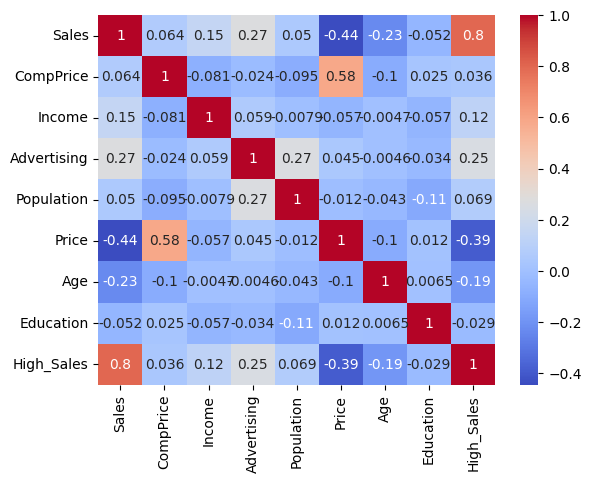

In [6]:
data.head()
sns.countplot(x='High_Sales', data=data)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [16]:
X_encoded = pd.get_dummies(X)

In [17]:
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [19]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7]})

In [20]:
y_pred = grid_search.predict(X_test_encoded)

In [21]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

In [23]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.6875
Precision: 0.7142857142857143
Recall: 0.6976744186046512
F1 Score: 0.7058823529411765


In [25]:
pruned_clf = DecisionTreeClassifier(**grid_search.best_params_)
pruned_clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [28]:
k = 5

In [29]:
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [30]:
for train_index, val_index in kf.split(X_encoded):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [31]:
 pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [32]:
y_val_pred = pruned_clf.predict(X_val)

In [34]:
accuracy_val = metrics.accuracy_score(y_val, y_val_pred)
precision_val = metrics.precision_score(y_val, y_val_pred)
recall_val = metrics.recall_score(y_val, y_val_pred)
f1_score_val = metrics.f1_score(y_val, y_val_pred)

In [35]:
print("Fold Results:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_score_val)
print("--------------------")

Fold Results:
Accuracy: 0.85
Precision: 0.8108108108108109
Recall: 0.8571428571428571
F1 Score: 0.8333333333333334
--------------------


In [37]:
pruned_clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [39]:
encoded_feature_names = X_train_encoded.columns.tolist()

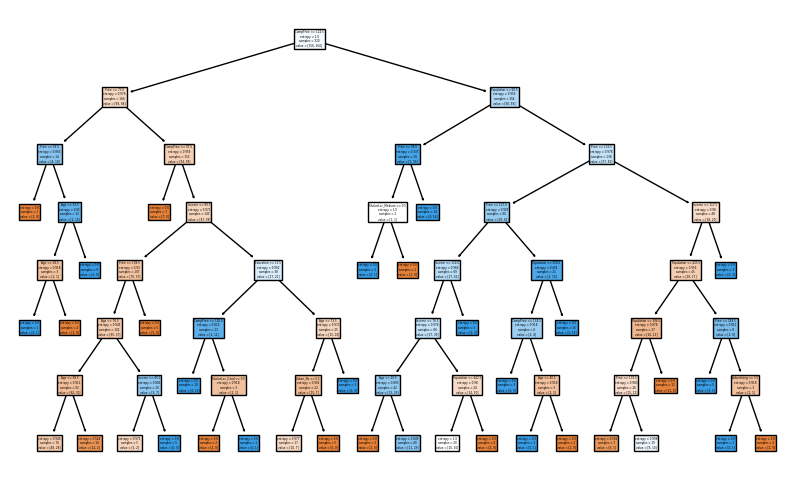

In [40]:
plt.figure(figsize=(10, 6))
plot_tree(pruned_clf, feature_names=encoded_feature_names, filled=True)
plt.show()

In [42]:
y_pred = pruned_clf.predict(X_test_encoded)

In [43]:
cm = confusion_matrix(y_test, y_pred)

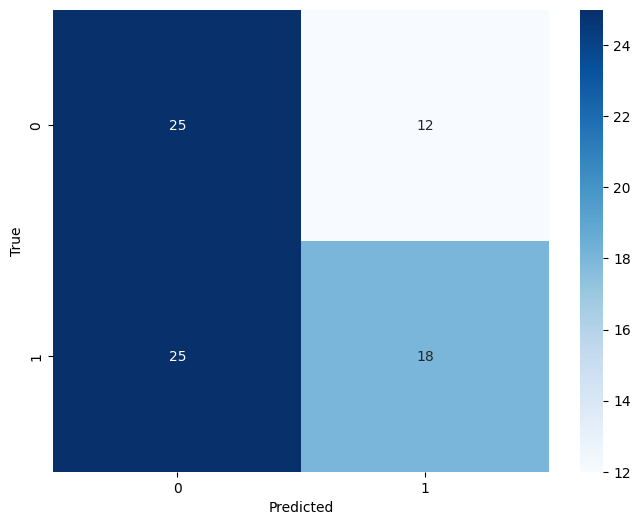

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()